# Investigating Differences Between Schools With Different Male to Female Ratios

Author: Qi Wang

In this notebook we will compare the different polarity trends between schools of different male to female ratios.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read in College Data CSV
college_data = pd.read_csv('college-records.csv')

In [3]:
college_data.head()

,,Name,Public / Private,Annual Tuition (2023),Undergraduate Population (2023),Acceptance rate (2021),Ranking (top 100 or not),Geographic location,Male : Female (ratio),Type of College,...,2018,2019,2020,2021,2022,Bipartisan Slope,Bipartisan y-intercept,Ownership,County,State
0,region,name,publicprivate,tuition,population,acceptance,ranking,geo,male2female,college-type,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ownership,County,State
1,us-west,Stanford,Private,"$57,692","7,761",4.34%,6,Suburban,49 : 51,Research,...,-6.244466,-5.684776,-7.151565,-6.981125,-5.677183,-1.537808,2008.18996,Independent,Santa Clara,California
2,us-west,UC Berkeley,Public,"$43,980","32,143",17.50%,49,Urban,46 : 54,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Alameda,California
3,us-west,Santa Clara,Private,"$58,017","5,895",52.00%,NaN,Suburban,53 : 47,Catholic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Santa Clara,California
4,us-west,Caltech,Private,"$58,479",901,6.70%,2,Suburban,65 : 35,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Los Angeles,California


## Peforming Linear Regression

Here, we will use the Linear Regression model from sci-kit learn to give us the slope of the polarity across years.

In [4]:
# Initialize Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [5]:
slopes = []

for _, row in college_data.iterrows():
    y = []
    for year in range(2013, 2023):
        if (not pd.isna(row[str(year)])):
            y.append(row[str(year)])
            
    if len(y) == 0:
        slopes.append(np.nan)
        continue
    
    X = np.arange(1, len(y) + 1, 1).reshape(-1,1)
    Y = np.array(y)

    model.fit(X, Y)
#     print(model.coef_)
    slopes.append(model.coef_[0])

college_data['slopes'] = slopes

In [6]:
college_data.head(10)

,,Name,Public / Private,Annual Tuition (2023),Undergraduate Population (2023),Acceptance rate (2021),Ranking (top 100 or not),Geographic location,Male : Female (ratio),Type of College,...,2019,2020,2021,2022,Bipartisan Slope,Bipartisan y-intercept,Ownership,County,State,slopes
0,region,name,publicprivate,tuition,population,acceptance,ranking,geo,male2female,college-type,...,NaN,NaN,NaN,NaN,NaN,NaN,ownership,County,State,NaN
1,us-west,Stanford,Private,"$57,692","7,761",4.34%,6,Suburban,49 : 51,Research,...,-5.684776,-7.151565,-6.981125,-5.677183,-1.537808,2008.189960,Independent,Santa Clara,California,-0.201137
2,us-west,UC Berkeley,Public,"$43,980","32,143",17.50%,49,Urban,46 : 54,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Alameda,California,-0.294596
3,us-west,Santa Clara,Private,"$58,017","5,895",52.00%,NaN,Suburban,53 : 47,Catholic,...,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Santa Clara,California,NaN
4,us-west,Caltech,Private,"$58,479",901,6.70%,2,Suburban,65 : 35,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Los Angeles,California,NaN
5,us-west,USC,Private,"$63,468","20,790",21.10%,43,Urban,46 : 54,Research,...,-2.692837,-5.143249,-2.996033,-0.472082,-0.225776,452.264168,Independent,Los Angeles,California,0.074160
6,us-west,University of Washington,Public,"$40,740","30,856",53.50%,NaN,Urban,45 : 55,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,Independent,King,Washington,NaN
7,us-west,Harvey Mudd College,Private,"$62,516",905,10%,28,Suburban,50 : 50,Science & Engineering,...,NaN,0.761180,0.151384,0.425327,NaN,NaN,Independent,Los Angeles,California,0.089283
8,us-west,Pomona College,Private,"$59,238","1,764",6.60%,16,Suburban,45 : 55,Liberal Arts,...,-5.880843,-7.086419,-6.771482,NaN,-0.570280,1144.353493,Independent,Los Angeles,California,-0.524290
9,us-west,UCLA,Public,"$13,804","31,600",10.80%,35,Urban,44 : 56,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Los Angeles,California,NaN


Now we will create a new column with fractional values for the Male to Female ratios

In [7]:
ratios = []

for _, row in college_data.iterrows():
    if row['Male : Female (ratio)'] == 'male2female':
        ratios.append(0)
        continue
    rat = row['Male : Female (ratio)'].split(' : ')
    
    ratios.append(int(rat[0]) / int(rat[1]))
    
college_data['Gender Ratio'] = ratios

In [8]:
college_data.head(10)

,,Name,Public / Private,Annual Tuition (2023),Undergraduate Population (2023),Acceptance rate (2021),Ranking (top 100 or not),Geographic location,Male : Female (ratio),Type of College,...,2020,2021,2022,Bipartisan Slope,Bipartisan y-intercept,Ownership,County,State,slopes,Gender Ratio
0,region,name,publicprivate,tuition,population,acceptance,ranking,geo,male2female,college-type,...,NaN,NaN,NaN,NaN,NaN,ownership,County,State,NaN,0.000000
1,us-west,Stanford,Private,"$57,692","7,761",4.34%,6,Suburban,49 : 51,Research,...,-7.151565,-6.981125,-5.677183,-1.537808,2008.189960,Independent,Santa Clara,California,-0.201137,0.960784
2,us-west,UC Berkeley,Public,"$43,980","32,143",17.50%,49,Urban,46 : 54,Research,...,NaN,NaN,NaN,NaN,NaN,Independent,Alameda,California,-0.294596,0.851852
3,us-west,Santa Clara,Private,"$58,017","5,895",52.00%,NaN,Suburban,53 : 47,Catholic,...,NaN,NaN,NaN,NaN,NaN,Independent,Santa Clara,California,NaN,1.127660
4,us-west,Caltech,Private,"$58,479",901,6.70%,2,Suburban,65 : 35,Research,...,NaN,NaN,NaN,NaN,NaN,Independent,Los Angeles,California,NaN,1.857143
5,us-west,USC,Private,"$63,468","20,790",21.10%,43,Urban,46 : 54,Research,...,-5.143249,-2.996033,-0.472082,-0.225776,452.264168,Independent,Los Angeles,California,0.074160,0.851852
6,us-west,University of Washington,Public,"$40,740","30,856",53.50%,NaN,Urban,45 : 55,Research,...,NaN,NaN,NaN,NaN,NaN,Independent,King,Washington,NaN,0.818182
7,us-west,Harvey Mudd College,Private,"$62,516",905,10%,28,Suburban,50 : 50,Science & Engineering,...,0.761180,0.151384,0.425327,NaN,NaN,Independent,Los Angeles,California,0.089283,1.000000
8,us-west,Pomona College,Private,"$59,238","1,764",6.60%,16,Suburban,45 : 55,Liberal Arts,...,-7.086419,-6.771482,NaN,-0.570280,1144.353493,Independent,Los Angeles,California,-0.524290,0.818182
9,us-west,UCLA,Public,"$13,804","31,600",10.80%,35,Urban,44 : 56,Research,...,NaN,NaN,NaN,NaN,NaN,Independent,Los Angeles,California,NaN,0.785714


## Plotting
We will plot the avaliable polarities with the different gender ratios

In [9]:
import matplotlib.pyplot as plt

In [10]:
x = []
y = []

for _, row in college_data.iterrows():
    if not pd.isna(row['slopes']):
        x.append(float(row['Gender Ratio']))
        y.append(float(row['slopes']))
    
x = np.array(x)
y = np.array(y)

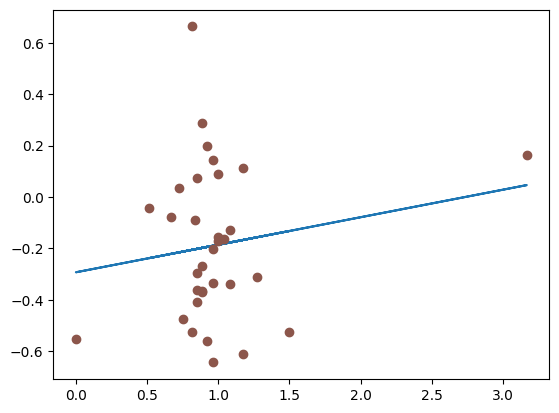

In [11]:
# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.plot(x, y, 'o', color='tab:brown')

Let's remove the outlier

In [12]:
x = []
y = []

for _, row in college_data.iterrows():
    if not pd.isna(row['slopes']) and row['Gender Ratio'] < 2 and row['Gender Ratio'] > 0:
        x.append(float(row['Gender Ratio']))
        y.append(float(row['slopes']))
    
x = np.array(x)
y = np.array(y)

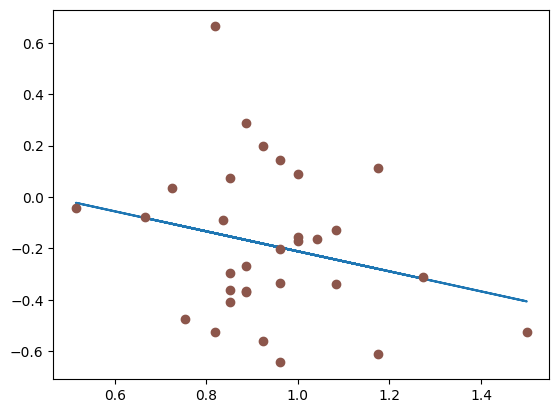

In [13]:
# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.plot(x, y, 'o', color='tab:brown')

# R Graphs

Using `plotnine` package

In [14]:
from plotnine import *
%matplotlib inline

In [15]:
df = pd.DataFrame({
    'Male_Female': x,
    'Bipartisan Slope':y
})
df

,Male_Female,Bipartisan Slope
0,0.960784,-0.201137
1,0.851852,-0.294596
2,0.851852,0.074160
3,1.000000,0.089283
4,0.818182,-0.524290
5,1.000000,-0.171053
6,0.960784,-0.335393
7,1.000000,-0.156909
8,1.040816,-0.164242
9,1.173913,0.112422


In [16]:
plot = (ggplot(df, aes('Male_Female', 'Bipartisan Slope'))
 + geom_point(color = 'royalblue')
 + xlab("Male Female Ratio")
 + ggtitle("Male Female Ratio vs Bipartisan Slope")
 + stat_smooth(method='lm', color='indianred'))

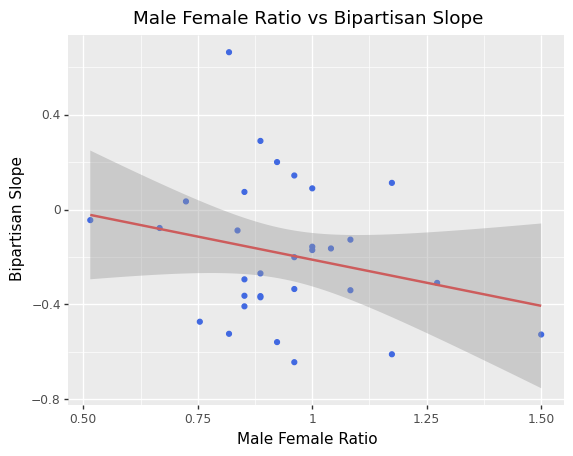

<ggplot: (8762275179745)>

In [17]:
plot

In [18]:
plot.save(filename = 'ratoi.png', dpi=1000)

/home/harry/.local/lib/python3.11/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/harry/.local/lib/python3.11/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ratoi.png


# Statistical Test
Now we will conduct a Linear Regression T-Test to see if there is a linear relationship between the gender ratio and the polarity trend across years.

H0: β=0

Ha: β≠0

α = 0.05

In [19]:
import statsmodels.api as sm

In [20]:
x = sm.add_constant(x)

In [21]:
model = sm.OLS(y, x).fit()

In [22]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.827
Date:                Sun, 23 Jul 2023   Prob (F-statistic):              0.187
Time:                        17:53:47   Log-Likelihood:                -4.6421
No. Observations:                  31   AIC:                             13.28
Df Residuals:                      29   BIC:                             16.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1779      0.276      0.646      0.5

With a P-value of 0.187, there is not evidence of a linear relationship between the gender ratios and polarity slopes